In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump
from joblib import load
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO


In [31]:
def read_parquet_files(file_path):
    data_dir = Path(file_path)
    df = pd.concat(
            pd.read_parquet(parquet_file)
            for parquet_file in data_dir.glob('*.parquet')
        )
    return df

In [32]:
touch_down_home_df_left = read_parquet_files('../dataset/filterdata/hometeamtouchdownleft/')

touch_down_home_df_left.head()

False


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T23:44:27.500,115.15,15.12,3.47,1.6,0.34,113.72,111.08,touchdown,35509,Ed Dickson,84,TE,home,115,2018123015,3202,left
1,2018-12-30T23:44:27.500,69.03,10.9,1.33,0.4,0.14,108.86,118.47,touchdown,39232,Neiko Thorpe,23,CB,home,115,2018123015,3202,left
2,2018-12-30T23:44:27.500,98.68,17.22,3.65,1.09,0.37,111.12,99.35,touchdown,39952,Barkevious Mingo,51,OLB,home,115,2018123015,3202,left
3,2018-12-30T23:44:27.500,106.8,12.64,4.54,1.27,0.46,93.37,89.42,touchdown,41339,Maurice Alexander,35,SS,home,115,2018123015,3202,left
4,2018-12-30T23:44:27.500,115.85,13.35,2.3,2.92,0.17,195.41,136.85,touchdown,41973,Tyler Ott,69,LS,home,115,2018123015,3202,left


In [36]:
touch_down_home_df_right = read_parquet_files('../dataset/filterdata/hometeamtouchdownright/')

touch_down_home_df_right.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-25T01:21:49.900,11.14,51.85,6.88,2.23,0.7,275.44,265.26,touchdown,37251,Dwayne Harris,17,WR,home,263,2018122400,241,right
1,2018-12-25T01:21:49.900,24.96,50.51,5.74,1.35,0.58,266.37,263.28,touchdown,38643,Kyle Wilber,58,OLB,home,263,2018122400,241,right
2,2018-12-25T01:21:49.900,17.75,48.47,6.07,1.45,0.61,272.99,269.87,touchdown,39109,Derek Carrier,85,TE,home,263,2018122400,241,right
3,2018-12-25T01:21:49.900,20.4,47.14,6.43,1.48,0.65,270.72,268.87,touchdown,39908,Erik Harris,25,SS,home,263,2018122400,241,right
4,2018-12-25T01:21:49.900,29.8,51.41,5.87,1.36,0.59,258.9,259.43,touchdown,40353,Rashaan Melvin,22,CB,home,263,2018122400,241,right


In [38]:
cordinates_left = touch_down_home_df_left[['x', 'y']]

cordinates_right = touch_down_home_df_right[['x', 'y']]

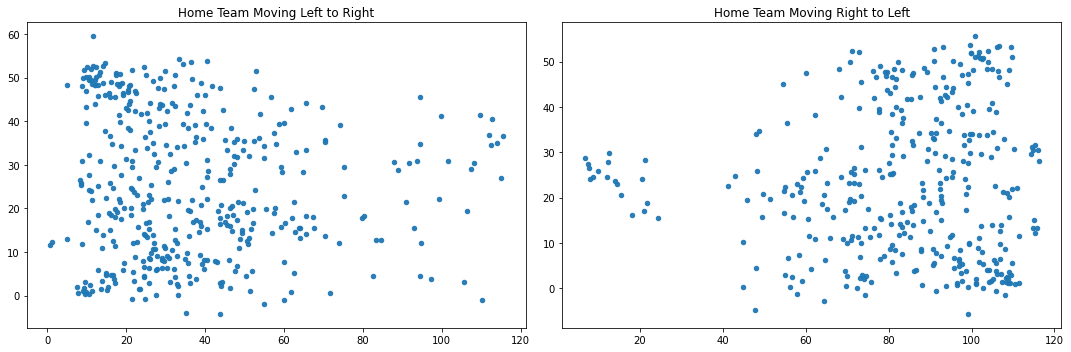

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(x=cordinates_right["x"].astype(float), y=cordinates_right["y"].astype(float), alpha=.945, s=20)
axes[0].set_title('Home Team Moving Left to Right')

axes[1].scatter(x=cordinates_left["x"].astype(float), y=cordinates_left["y"].astype(float), alpha=.945, s=20)
axes[1].set_title('Home Team Moving Right to Left')

fig.tight_layout()

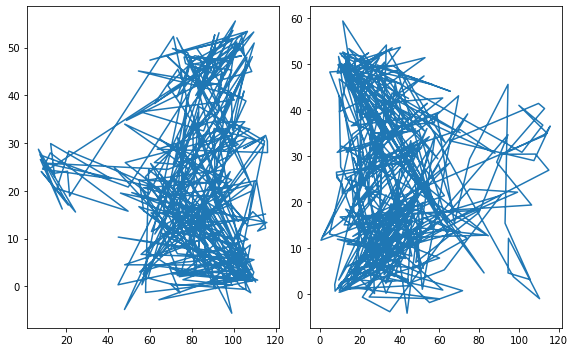

In [43]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

axes[0].plot(cordinates_left["x"].astype(float), cordinates_left["y"].astype(float))
axes[1].plot(cordinates_right["x"].astype(float), cordinates_right["y"].astype(float))

fig.tight_layout()